# https://easy.dans.knaw.nl/ui/datasets/id/easy-dataset:59831

The variables w1cmun2009id and w2cmun2012id contain an ID linked to a municipality. But it is unclear what ID belongs to which municipality

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_spss('NELLS/NELLS panel nl v1_2.sav')

In [3]:
df.shape

(5312, 1551)

In [6]:
df[['w1crespnr', 'w1calter1_id',  'w1calter2_id', 'w1calter3_id', 'w1calter4_id', 'w1calter5_id']]

,w1crespnr,w1calter1_id,w1calter2_id,w1calter3_id,w1calter4_id,w1calter5_id
0,9.0,NaN,NaN,NaN,NaN,NaN
1,19.0,NaN,NaN,NaN,NaN,NaN
2,28.0,NaN,NaN,NaN,NaN,NaN
3,37.0,NaN,NaN,NaN,NaN,NaN
4,38.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5307,600006238.0,NaN,NaN,NaN,NaN,NaN
5308,600060086.0,NaN,NaN,NaN,NaN,NaN
5309,600060367.0,NaN,NaN,NaN,NaN,NaN
5310,600060933.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df['w1cethnic'].unique().tolist()

['Turkish, 1st gen',
 'Dutch',
 'Non West, 2nd gen',
 'Moroccan, 1st gen',
 'Turkish, 2nd gen',
 'Non West, 1st gen',
 'Moroccan, 2nd gen',
 'West, 2nd gen',
 'West, 1st gen']

In [8]:
df[['w1scb21a', 'w1scb21b', 'w1scb21c', 'w1scb21d', 'w1scb21e']] #friends: Dutch origin, Turkish, Morrocan, Surinamese/Antillian, other non-Western

,w1scb21a,w1scb21b,w1scb21c,w1scb21d,w1scb21e
0,NaN,NaN,NaN,NaN,NaN
1,ja,ja,nee,nee,nee
2,ja,ja,ja,nee,nee
3,nee,nee,nee,nee,nee
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5307,ja,nee,ja,nee,nee
5308,ja,nee,ja,ja,ja
5309,ja,nee,ja,nee,nee
5310,ja,nee,ja,ja,nee


In [9]:
df["w1cage"] = pd.to_numeric(df["w1cage"], downcast="float")

In [10]:
df.w1cage.dtypes

dtype('float32')

<AxesSubplot:ylabel='Count'>

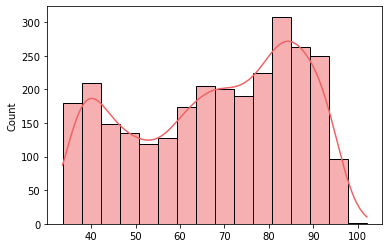

In [11]:
sns.histplot(df["w2cage"] + df["w1cage"], kde=True, color= "#f16364")

In [12]:
df[df['w1cage'] <=  20].shape

(928, 1551)

In [13]:
w1 = df[['w1cethnic', 'w1csex', 'w1cage', 'w1fg6_1', 'w1fg6_2', 'w1fg6_3', 'w1fg6_4', 'w1fg6_5']].copy()

In [14]:
w2 = df[['w1cethnic', 'w2csex', 'w2cage', 'w2fg6_1', 'w2fg6_2', 'w2fg6_3', 'w2fg6_4', 'w2fg6_5']].copy()

In [15]:
w2.columns = w1.columns

In [16]:
new = pd.concat([w1,w2], ignore_index=True, axis=0)
new

,w1cethnic,w1cmun2009id,w1csex,w1cage,w1fg6_1,w1fg6_2,w1fg6_3,w1fg6_4,w1fg6_5
0,"Turkish, 1st gen",1223.0,vrouw,39.000000,turkije,turkije,turkije,NaN,NaN
1,"Turkish, 1st gen",166.0,man,40.000000,turkije,turkije,turkije,turkije,nederland
2,Dutch,1559.0,vrouw,40.000000,nederland,nederland,nederland,nederland,NaN
3,"Turkish, 1st gen",1223.0,man,46.000000,turkije,nederland,NaN,NaN,NaN
4,"Non West, 2nd gen",370.0,man,40.000000,nederland,nederland,nederland,nederland,nederland
...,...,...,...,...,...,...,...,...,...
10619,"Moroccan, 2nd gen",386.0,vrouw,31.356605,Marokko,Marokko,NaN,NaN,NaN
10620,"Moroccan, 1st gen",386.0,man,31.537303,Anders,Marokko,NaN,NaN,NaN
10621,"Moroccan, 1st gen",386.0,man,38.502396,Marokko,NaN,NaN,NaN,NaN
10622,"Moroccan, 1st gen",386.0,vrouw,39.074606,Nederland,NaN,NaN,NaN,NaN


In [15]:
new = new[new["w1csex"] == "vrouw"]

In [16]:
new = new[new["w1cethnic"].isin(["Turkish, 1st gen", "Turkish, 2nd gen", "Dutch", "Moroccan, 1st gen", "Moroccan, 2nd gen"])].copy()
new["w1cethnic"] = new["w1cethnic"].replace("Turkish, 1st gen", "Turkish")
new["w1cethnic"] = new["w1cethnic"].replace("Turkish, 2nd gen", "Turkish")
new["w1cethnic"] = new["w1cethnic"].replace("Moroccan, 1st gen", "Moroccan")
new["w1cethnic"] = new["w1cethnic"].replace("Moroccan, 2nd gen", "Moroccan")

In [17]:
new["w1cethnic"] = pd.Categorical(new["w1cethnic"], ['Turkish','Moroccan','Dutch'])

In [18]:
new['ethnicity'] = new['w1cethnic']

In [19]:
new['w1cethnic'].unique().tolist()

['Turkish', 'Dutch', 'Moroccan']

In [20]:
colors = sns.color_palette(["#FF0000", "#00FF00", "#0000FF", "#FF00FF"])
py_colors = ListedColormap(colors.as_hex())

In [21]:
colors

[(1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 0.0, 1.0), (1.0, 0.0, 1.0)]

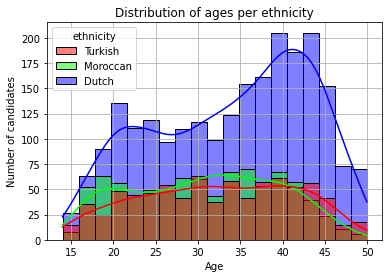

In [22]:
fig, ax = plt.subplots()

sns.histplot(new, x="w1cage", hue="ethnicity", kde=True, palette=sns.color_palette(["#FF0000", "#00FF00", "#0000FF"]))
plt.title('Distribution of ages per ethnicity')
plt.ylabel('Number of candidates')
plt.xlabel('Age')
plt.grid()
#plt.legend(title="Ethnicity", labels=["Moroccan", "Turkish", "Dutch"])
plt.savefig("D:/juju/lumc/msc_thesis/report/images/ethnicitydistribution.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='w1cage', ylabel='Count'>

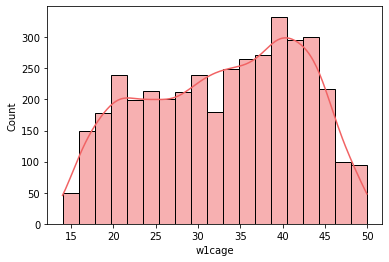

In [23]:
sns.histplot(new["w1cage"], kde=True, color= "#f16364")

In [24]:
new["Friends"] = new[['w1fg6_1', 'w1fg6_2', 'w1fg6_3', 'w1fg6_4', 'w1fg6_5']].count(axis=1)

In [25]:
new['w1fg6_1'] = new['w1fg6_1'].str.lower()
new['w1fg6_2'] = new['w1fg6_2'].str.lower()
new['w1fg6_3'] = new['w1fg6_3'].str.lower()
new['w1fg6_4'] = new['w1fg6_4'].str.lower()
new['w1fg6_5'] = new['w1fg6_5'].str.lower()

In [26]:
new["Moroccans"] = 0
new["Moroccans"] += [1 if ele == "marokko" else 0 for ele in new["w1fg6_1"]]
new["Moroccans"] += [1 if ele == "marokko" else 0 for ele in new["w1fg6_2"]]
new["Moroccans"] += [1 if ele == "marokko" else 0 for ele in new["w1fg6_3"]]
new["Moroccans"] += [1 if ele == "marokko" else 0 for ele in new["w1fg6_4"]]
new["Moroccans"] += [1 if ele == "marokko" else 0 for ele in new["w1fg6_5"]]
new["Moroccans"] /= new["Friends"]

In [27]:
new["Dutch"] = 0
new["Dutch"] += [1 if ele == "nederland" else 0 for ele in new["w1fg6_1"]]
new["Dutch"] += [1 if ele == "nederland" else 0 for ele in new["w1fg6_2"]]
new["Dutch"] += [1 if ele == "nederland" else 0 for ele in new["w1fg6_3"]]
new["Dutch"] += [1 if ele == "nederland" else 0 for ele in new["w1fg6_4"]]
new["Dutch"] += [1 if ele == "nederland" else 0 for ele in new["w1fg6_5"]]
new["Dutch"] /= new["Friends"]

In [28]:
new["Turkish"] = 0
new["Turkish"] += [1 if ele == "turkije" else 0 for ele in new["w1fg6_1"]]
new["Turkish"] += [1 if ele == "turkije" else 0 for ele in new["w1fg6_2"]]
new["Turkish"] += [1 if ele == "turkije" else 0 for ele in new["w1fg6_3"]]
new["Turkish"] += [1 if ele == "turkije" else 0 for ele in new["w1fg6_4"]]
new["Turkish"] += [1 if ele == "turkije" else 0 for ele in new["w1fg6_5"]]
new["Turkish"] /= new["Friends"]

In [29]:
new["Other"] = 0
new["Other"] += [1 if ((ele not in (["marokko","nederland","turkije"])) and not (pd.isna(ele))) else 0 for ele in new["w1fg6_1"]]
new["Other"] += [1 if ((ele not in (["marokko","nederland","turkije"])) and not (pd.isna(ele))) else 0 for ele in new["w1fg6_2"]]
new["Other"] += [1 if ((ele not in (["marokko","nederland","turkije"])) and not (pd.isna(ele))) else 0 for ele in new["w1fg6_3"]]
new["Other"] += [1 if ((ele not in (["marokko","nederland","turkije"])) and not (pd.isna(ele))) else 0 for ele in new["w1fg6_4"]]
new["Other"] += [1 if ((ele not in (["marokko","nederland","turkije"])) and not (pd.isna(ele))) else 0 for ele in new["w1fg6_5"]]
new["Other"] /= new["Friends"]

In [30]:
new

,w1cethnic,w1csex,w1cage,w1fg6_1,w1fg6_2,w1fg6_3,w1fg6_4,w1fg6_5,ethnicity,Friends,Moroccans,Dutch,Turkish,Other
0,Turkish,vrouw,39.000000,turkije,turkije,turkije,NaN,NaN,Turkish,3,0.0,0.0,1.000000,0.000000
2,Dutch,vrouw,40.000000,nederland,nederland,nederland,nederland,NaN,Dutch,4,0.0,1.0,0.000000,0.000000
7,Dutch,vrouw,29.000000,nederland,NaN,NaN,NaN,NaN,Dutch,1,0.0,1.0,0.000000,0.000000
9,Turkish,vrouw,44.000000,suriname,turkije,turkije,NaN,NaN,Turkish,3,0.0,0.0,0.666667,0.333333
16,Moroccan,vrouw,44.000000,marokko,marokko,NaN,NaN,NaN,Moroccan,2,1.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,Dutch,vrouw,41.032170,nederland,nederland,nederland,nederland,NaN,Dutch,4,0.0,1.0,0.000000,0.000000
10615,Dutch,vrouw,28.936345,anders,nederland,nederland,nederland,nederland,Dutch,5,0.0,0.8,0.000000,0.200000
10619,Moroccan,vrouw,31.356605,marokko,marokko,NaN,NaN,NaN,Moroccan,2,1.0,0.0,0.000000,0.000000
10622,Moroccan,vrouw,39.074606,nederland,NaN,NaN,NaN,NaN,Moroccan,1,0.0,1.0,0.000000,0.000000


In [31]:
moroccans = new[new["w1cethnic"].isin(["Moroccan"])].copy()
moroccans["age"] = pd.cut(moroccans["w1cage"], 4)
moroccans_sum = moroccans.groupby("age").mean()


In [32]:
moroccans.groupby("age").mean()

,w1cage,Friends,Moroccans,Dutch,Turkish,Other
age,,,,,,
"(14.965, 23.694]",19.263124,2.285714,0.670415,0.240191,0.028628,0.060766
"(23.694, 32.388]",28.351371,2.121569,0.784621,0.163821,0.007317,0.044241
"(32.388, 41.083]",36.689316,1.947368,0.792884,0.160861,0.013046,0.033208
"(41.083, 49.777]",43.893914,2.172414,0.776453,0.166361,0.006728,0.050459


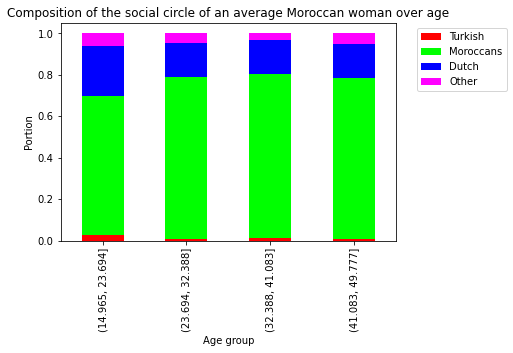

In [33]:
moroccans_sum[["Turkish", "Moroccans", "Dutch", "Other"]].plot(kind='bar', stacked=True, cmap=py_colors)
plt.title('Composition of the social circle of an average Moroccan woman over age')
plt.ylabel('Portion')
plt.xlabel('Age group')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig("D:/juju/lumc/msc_thesis/report/images/moroccansageethnicitydistribution.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

In [34]:
turkish = new[new["w1cethnic"].isin(["Turkish"])].copy()
turkish["age"] = pd.cut(turkish["w1cage"], 4)
turkish_sum = turkish.groupby("age").mean()

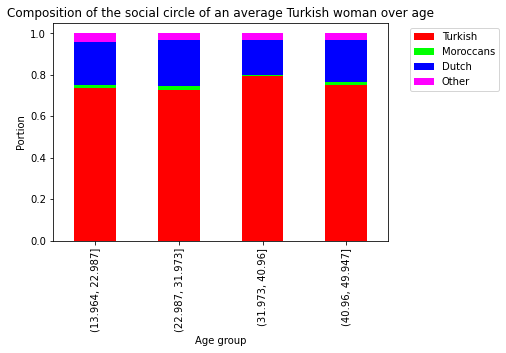

In [35]:
turkish_sum[["Turkish", "Moroccans", "Dutch", "Other"]].plot(kind='bar', stacked=True, cmap=py_colors)
plt.title('Composition of the social circle of an average Turkish woman over age')
plt.ylabel('Portion')
plt.xlabel('Age group')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig("D:/juju/lumc/msc_thesis/report/images/turkishageethnicitydistribution.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
dutch = new[new["w1cethnic"].isin(["Dutch"])].copy()
dutch["age"] = pd.cut(dutch["w1cage"], 4)
dutch_sum= dutch.groupby("age").mean()

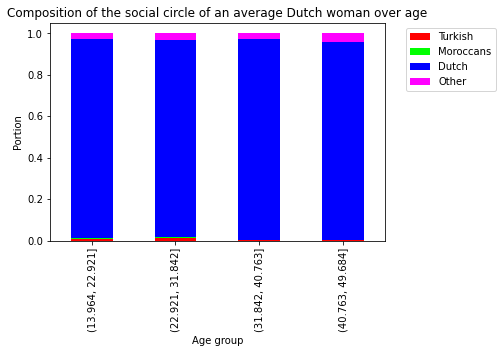

In [37]:
dutch_sum[["Turkish", "Moroccans", "Dutch", "Other"]].plot(kind='bar', stacked=True, cmap=py_colors)
plt.title('Composition of the social circle of an average Dutch woman over age')
plt.ylabel('Portion')
plt.xlabel('Age group')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig("D:/juju/lumc/msc_thesis/report/images/dutchageethnicitydistribution.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

Get mean + std

In [38]:
print("Moroccans")
moroccans = new[new["w1cethnic"].isin(["Moroccan"])].copy()
moroccans["T+O"] = moroccans["Turkish"] + moroccans["Other"]
moroccans.describe().loc[["mean","std"]]

Moroccans


,w1cage,Friends,Moroccans,Dutch,Turkish,Other,T+O
mean,30.787146,2.113636,0.757481,0.182411,0.014440,0.045668,0.060108
std,8.685478,1.390131,0.358922,0.322347,0.090536,0.162222,0.185949


In [39]:
print("Turkish")
turkish = new[new["w1cethnic"].isin(["Turkish"])].copy()
turkish["M+O"] = turkish["Turkish"] + turkish["Other"]
turkish.describe().loc[["mean","std"]]

Turkish


,w1cage,Friends,Moroccans,Dutch,Turkish,Other,M+O
mean,32.264745,2.272615,0.014383,0.198287,0.753755,0.033575,0.787330
std,9.053984,1.410711,0.088717,0.327867,0.350850,0.130619,0.334428


In [40]:
print("Dutch")
dutch = new[new["w1cethnic"].isin(["Dutch"])].copy()
dutch["M+T+O"] = dutch["Turkish"] + dutch["Other"] + dutch["Moroccans"]
dutch.describe().loc[["mean","std"]]

Dutch


,w1cage,Friends,Moroccans,Dutch,Turkish,Other,M+T+O
mean,33.885791,3.032637,0.003066,0.959825,0.004126,0.032983,0.040175
std,9.245050,1.475464,0.040677,0.145681,0.053564,0.128473,0.145681
